# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from IPython import display
import time

from envs.windy_grid_world import WindyGridWorld

# Experiments

In [2]:
env = WindyGridWorld(grid_size=(7, 10), stochasticity=0.1)

num_actions = 4
eps = 0.1
gamma = 0.99
alpha = 0.7

def q_learning(env, max_episodes=10, max_steps=100, visualize=True):
    # initialize Q-function
    q = np.zeros((env.w, env.h, num_actions))
    for ep in range(max_episodes):
        s = env.reset()
        for i in range(max_steps):
            # choose action e-greedily
            if np.random.rand() < eps:
                a = np.random.randint(num_actions)
            else:
                a = np.argmax(q[s[0],s[1]])
            # make a step in the environment
            s_, r, done = env.step(a)
            # update Q-values with TD-targets
            td_target = r + gamma * np.max(q[s_[0],s_[1]])
            q[s[0],s[1],a] = q[s[0],s[1],a] + \
                alpha * (td_target - q[s[0],s[1],a])
            s = s_
            if done:
                break

        if visualize and ep % 10 == 0:
            plt.imshow(np.rot90(np.max(q, axis=-1)), cmap="gray")
            display.clear_output(wait=True)
            display.display(plt.gcf())
            time.sleep(0.01)

    return q

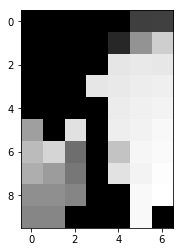

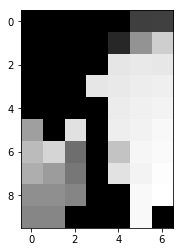

In [3]:
q = q_learning(env, max_episodes=1000, visualize=True)

In [4]:
greedy_q_policy = lambda state: np.argmax(q[state[0],state[1]])

1

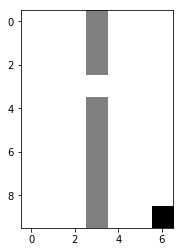

In [5]:
env.play_with_policy(greedy_q_policy)